In [ ]:
# install onnx librarys
!pip install -U tf2onnx onnx onnxruntime

In [1]:
# get keras model list

from glob import glob
from tensorflow import keras
import os

model_pathes = glob("*.h5")

### Tensorflow to ONNX

In [ ]:
import tensorflow as tf
from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2

with tf.device("/device:GPU:0"):
    for model_path in model_pathes:
        model_name = model_path[:model_path.find('.')]

        model = keras.models.load_model(model_path, compile=False)
        export_path = './model/' + model_name
        model.save(export_path, save_format='tf')
        
        os.system(f"python -m tf2onnx.convert --saved-model ./model/{model_name} --output ./model/{model_name}.onnx  --opset 11")
        
        print(model_name)

### ONNX

In [1]:
import onnx
import onnxruntime
import cv2
import matplotlib.pyplot as plt

num = 1

model_path = f"./model/AESC_R{num}.onnx"
onnx_model = onnx.load(model_path)
onnx.checker.check_model(onnx_model)
ort_session = onnxruntime.InferenceSession(model_path)

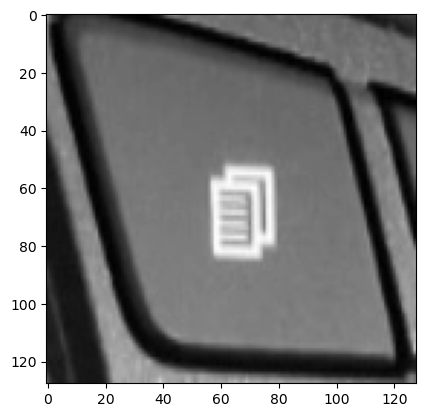

In [2]:
img = cv2.imread(f'./img/{num}.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, [128, 128])

plt.imshow(img, cmap='gray')

In [3]:
input = (img / 255.0).reshape(1, 128, 128, 1).astype('float32')
input.shape, input.dtype

((1, 128, 128, 1), dtype('float32'))

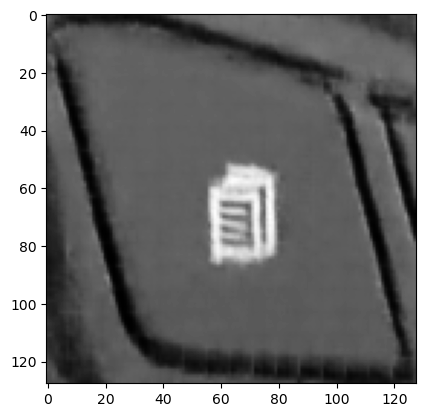

In [4]:
# compute ONNX Runtime output prediction
ort_inputs = {ort_session.get_inputs()[0].name: input}
ort_outs = ort_session.run(None, ort_inputs)

plt.imshow((ort_outs[0] * 255).reshape(128, 128), cmap='gray')

_______

### CV2 readNet

In [24]:
img = cv2.imread('R1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, [128, 128])

net = cv2.dnn.readNet("model.onnx")
blob = cv2.dnn.blobFromImage(img, 1/255., (128, 128))
net.setInput(blob)
prob = net.forward()

print('blob', blob.shape, blob[0][0])
print('prob', prob.shape)

blob (1, 1, 128, 128) 0.31764707
prob (1, 16384)


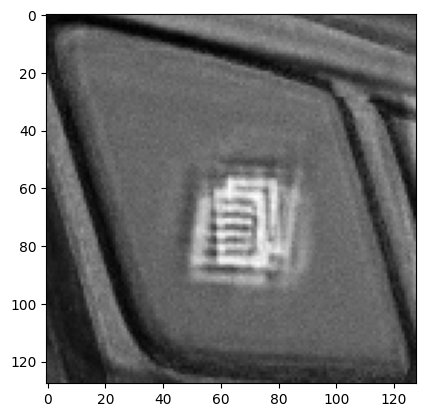

In [21]:
plt.imshow(prob.reshape(128, 128), cmap='gray')